In [1]:
%matplotlib inline
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:

# File to Load (Remember to change these)
city_file= "data/city_data.csv"
ride_file= "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_file)
ride_df=pd.read_csv(ride_file)

# Drop duplicates
city_df=city_df.drop_duplicates('city', keep='first')

# Merge
merge_df=city_df.merge(ride_df, on='city')


In [3]:
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


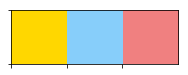

In [4]:
# Color Schemes
color_scheme={'Gold': '#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral': '#F08080'}
sns.palplot(sns.color_palette(color_scheme.values()))
plt.show()

In [5]:
# City Data
city_type=city_df.set_index('city')['type']

In [6]:
txt="Bubble Plot of Ride Sharing Data"
x=txt.title()
print(x)

#Group by City Name
by_city=merge_df.groupby('city')

#Average Fare by City
avg_fare=by_city.mean()['fare']

#Rides by City
ride_count=by_city['ride_id'].count()

#Number of Drivers
driver_count=by_city.mean()['driver_count']

Bubble Plot Of Ride Sharing Data


In [7]:
#DataFrame
city_info=pd.DataFrame({
    "Number of Rides":ride_count,
    "Average Fare":avg_fare,
    "Number of Drivers":driver_count,
    "Type of City": city_type   
})

In [8]:
city_info.sort_values('Number of Drivers', ascending=False)

,Number of Rides,Average Fare,Number of Drivers,Type of City
West Samuelburgh,25,21.767600,73.0,Urban
South Michelleport,31,24.451613,72.0,Urban
West Anthony,30,24.736667,70.0,Urban
Liumouth,33,26.150000,69.0,Urban
Port Angela,19,23.836842,67.0,Urban
Reynoldsfurt,19,21.919474,67.0,Urban
East Kaylahaven,29,23.757931,65.0,Urban
Royland,30,20.570667,64.0,Urban
Jerryton,25,25.649200,64.0,Urban
Grahamburgh,25,25.221200,61.0,Urban


In [9]:
#Separated DataFrames for City Categories
rural=city_info[city_info['Type of City']=='Rural']
suburban=city_info[city_info['Type of City']=='Suburban']
urban=city_info[city_info['Type of City']=='Urban']
city_color={'Urban': color_scheme['Gold'],'Suburban': color_scheme['Light Sky Blue'],'Rural':color_scheme ['Light Coral']}

In [10]:
plt.suptitle('Pyber Ride Sharing Data')

Text(0.5, 0.98, 'Pyber Ride Sharing Data')

<Figure size 432x288 with 0 Axes>

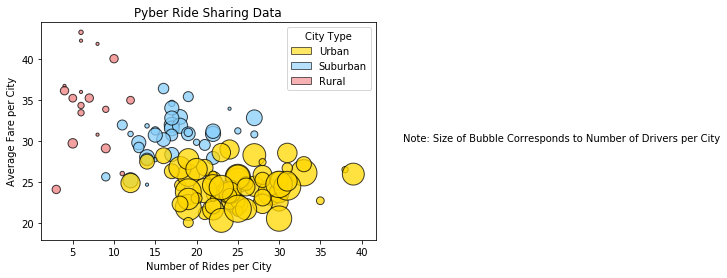

In [11]:
#Scatter Plots for each City Type
plt.scatter(rural['Number of Rides'],rural['Average Fare'], s=rural['Number of Drivers']*10, color=city_color['Rural'],edgecolor='black', label='Rural', alpha=.75)
plt.scatter(suburban['Number of Rides'],suburban['Average Fare'], s=suburban['Number of Drivers']*10, color=city_color['Suburban'],edgecolor='black', label='Suburban', alpha=.75)
plt.scatter(urban['Number of Rides'],urban['Average Fare'], s=urban['Number of Drivers']*10, color=city_color['Urban'],edgecolor='black', label='Urban', alpha=.75)

#Print Scatter Plot
plt.title('Pyber Ride Sharing Data')
plt.text(45,30,'Note: Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

import matplotlib.patches as mpatches 

U=mpatches.Circle((0.5,0.5),0.1, facecolor="gold", alpha=.6,edgecolor="black", linewidth=1)
S=mpatches.Circle((0.5,0.5),0.1, facecolor="lightskyblue", alpha=.6,edgecolor="black", linewidth=1)
R=mpatches.Circle((0.5,0.5),0.1, facecolor="lightcoral", alpha=.6,edgecolor="black", linewidth=1)

plt.legend([U,S,R],["Urban","Suburban","Rural"], title="City Type")

plt.show()

In [12]:
# Show plot
plt.show()

## Total Fares by City Type

In [13]:
txtFares="Total Fares by City Type"
x=txtFares.title()
print(x)

#Group by Type for Pie Charts
by_type=merge_df.groupby('type')['type','fare','ride_id','driver_count']

Total Fares By City Type


In [14]:
#Total Fare by City
fare_sum=by_type.sum()['fare']

In [15]:
#Build Pie Chart
labels=fare_sum.index

([<matplotlib.patches.Wedge at 0x9ddf630>,
 [Text(-0.2335959431524779, 1.0749106638891925, 'Rural'),
  Text(-1.0810743900820368, 0.2031702810667751, 'Suburban'),
  Text(1.2896181938371738, -0.5448714656908963, 'Urban')],
 [Text(-0.12741596899226065, 0.5863149075759231, '6.8%'),
  Text(-0.5896769400447472, 0.11082015330915004, '30.5%'),
  Text(0.8290402674667546, -0.3502745136584333, '62.7%')])

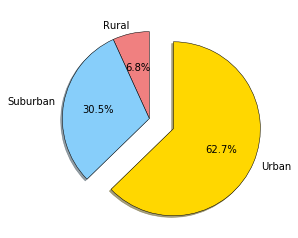

In [16]:
#Colors
colors=[city_color[n] for n in labels]
explode=[0,0,.3]
plt.pie(fare_sum, startangle=90, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth':.5, 'edgecolor':'black'})

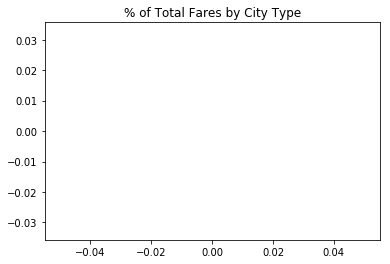

In [17]:
#Pie Chart Display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

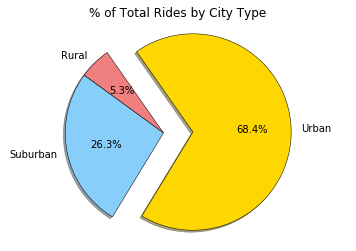

In [18]:
#Number of Rides per City Type
ride_sum=by_type.count()['ride_id']

#Calculate Ride Percents
labels=ride_sum.index
plt.pie(ride_sum, startangle=125, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth':.5,'edgecolor':'black'})

#Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.axis('equal')

#Show Chart
plt.show()


In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.104672587897539,
 1.3756658113080025,
 -1.2560456258246073,
 0.9506887989409958)

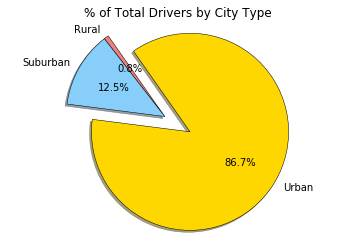

In [20]:
# Calculate Driver Percents
driver_sum=by_type.sum()['driver_count']

#Build Pie Charts
labels=driver_sum.index
plt.pie(driver_sum, startangle=125, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%",shadow=True, wedgeprops={'linewidth':.5,'edgecolor':'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')